In [3]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
data = np.loadtxt('bb_data_02.csv')
#print(len(data))
#sns.distplot(data , kde = True)
#plt.show()
from utilities import histogram_const_bin

def sort(x):
    return np.sort(x) 


def ne(t , N):
    def ne_(e):
        val = (1/2.40411*(t**3))*(e**2)/(np.exp(e/t)-1)
        return val
    def ne_norm(e):
        norm = N / integral(ne_ , 30 , 1000 , 500) 
        val = norm*(1/2.40411*(t**3))*(e**2)/(np.exp(e/t)-1)
        return val 
    return ne_norm

def integral(f,a_0,b_0,n,kind='simp'):
    h = (b_0-a_0)/n
    t0 = f(a_0)+f(b_0)

    if (kind=='simp'):
        t1 = sum([f(a_0+h*(2*k-1)) for k in range(1,int(n/2)+1)])
        t3 = sum([f(a_0+h*(2*k)) for k in range(1,int(n/2))])
        val = (h/3)*(t0+4*t1+2*t3)
    if(kind=='tpz'):
        t1 = sum([f(a_0+k*h) for k in range(1,n)])
        val = (h/2)*(t0+2*t1)
    return(val)


bin_len = 20 
data = sort(data)
binned_data = [data[i*20:(i+1)*20] for i in range(3)]

def cal_chi_sq(t):
    print('____________________')
    chi_sq = []
    for d in binned_data:
        en_min , en_max = d[0] , d[-1]
        th_count = integral(ne(t , 60) , en_min , en_max , 500)
        sigma = np.var(d)
        chi_sq.append(((th_count-20)**2)/(sigma))
        #print(th_count)
    s_chi_sq = sum(chi_sq)
    print(s_chi_sq)
    return s_chi_sq

T = np.arange(20,150 , step = 10)
chi_sq = [[t,cal_chi_sq(t)] for t in T]
print(chi_sq)


____________________
1.1799550656886677
____________________
0.9613763015242223
____________________
0.5358322600771953
____________________
0.24550510201532566
____________________
0.09188569606634736
____________________
0.022576835957346275
____________________
0.0020294627654418515
____________________
0.009908941796312215
____________________
0.03414361923365858
____________________
0.06718951271755452
____________________
0.10425059435540142
____________________
0.14232148760151223
____________________
0.1795893393068652
[[20, 1.1799550656886677], [30, 0.9613763015242223], [40, 0.5358322600771953], [50, 0.24550510201532566], [60, 0.09188569606634736], [70, 0.022576835957346275], [80, 0.0020294627654418515], [90, 0.009908941796312215], [100, 0.03414361923365858], [110, 0.06718951271755452], [120, 0.10425059435540142], [130, 0.14232148760151223], [140, 0.1795893393068652]]


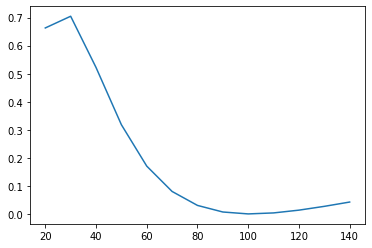

In [2]:
chi_sq_arr = np.asarray(chi_sq)
t , chi_sq_val = chi_sq_arr[:,0] , chi_sq_arr[:,1]
plt.plot(t,chi_sq_val)
plt.show()

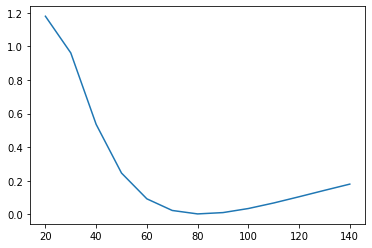

In [4]:
chi_sq_arr = np.asarray(chi_sq)
t , chi_sq_val = chi_sq_arr[:,0] , chi_sq_arr[:,1]
plt.plot(t,chi_sq_val)
plt.show()

____________________
0.09188569606634736
____________________
0.04937174426225037
____________________
0.022576835957346275
____________________
0.007737364462041877
____________________
0.0020294627654418515
____________________
0.0033066469953802117
____________________
0.009908941796312215
____________________
0.02053280359105311


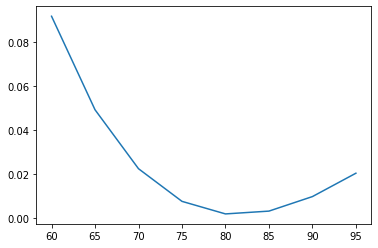

In [5]:
T = np.arange(60,100 , step = 5)
chi_sq = [[t,cal_chi_sq(t)] for t in T]
#print(chi_sq)
chi_sq_arr = np.asarray(chi_sq)
t , chi_sq_val = chi_sq_arr[:,0] , chi_sq_arr[:,1]
plt.plot(t,chi_sq_val)
plt.show()

____________________
0.007737364462041877
____________________
0.005942282419803719
____________________
0.004491412998529505
____________________
0.0033668355986395896
____________________
0.0025515592881025515
____________________
0.0020294627654418515
____________________
0.0017852387865894988
____________________
0.001804342797879895
____________________
0.0020729455073093994
____________________
0.0025778891235626647


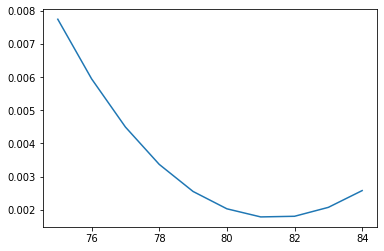

In [6]:
T = np.arange(75,85 , step = 1)
chi_sq = [[t,cal_chi_sq(t)] for t in T]
#print(chi_sq)
chi_sq_arr = np.asarray(chi_sq)
t , chi_sq_val = chi_sq_arr[:,0] , chi_sq_arr[:,1]
plt.plot(t,chi_sq_val)
plt.show()